# MODELIZACIÓN REGRESION EXPOSURE AT DEFAULT

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Ana/Desktop/DATA_SCIENCE_FOR_BUSINESS/PYTHON_DATA_SCIENCE_MASTERY/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS_/03_SCORING RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre = 'df_tablon_ead.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

## CREAR X e Y

In [5]:
x = df.drop(columns='target_ead')
y = df.target_ead

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
    
    #lightGBM
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [9]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,59.70,0.49,1.42,0.07,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.23,-0.23,0.00,1
1,55.71,0.91,1.44,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.23,-0.24,0.00,2
2,55.34,1.63,1.43,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.23,-0.24,0.00,3
3,58.48,0.77,1.46,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.23,-0.24,0.00,4
4,55.22,3.14,1.39,0.05,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,5
5,99.08,6.65,2.48,0.10,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.23,-0.24,-0.24,0.00,6
6,55.77,0.64,1.47,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,7
7,56.00,0.57,1.57,0.16,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,8
8,59.31,2.06,1.49,0.06,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,20,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.23,-0.24,-0.24,-0.24,0.00,9
9,57.02,0.14,1.54,0.08,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,10,200,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.24,-0.24,-0.24,-0.24,0.00,10


Vemos que el resultado es el mismo en todas las primeras configuraciones.

Por sencillez nos quedamos con el primero.

Y reentreamos el modelo con esa configuración.

In [10]:
modelo_ead = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 10,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.75)
modelo_ead.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.75, max_depth=10,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [11]:
pred = modelo_ead.predict(val_x)

Corregimos los máximos y mínimos.

In [12]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evaluar sobre validación

In [13]:
mean_absolute_error(val_y, pred)

0.23562155243803248

## REPORTING DEL MODELO

In [14]:
check_validacion = pd.DataFrame({'ead_real':val_y, 'ead_pred':pred})
check_validacion

,ead_real,ead_pred
id_cliente,,
4454651,0.96,0.30
131711869,0.88,0.68
14489492,0.00,0.31
118194389,0.55,0.49
76355345,0.00,0.15
...,...,...
100246304,0.69,0.39
123909045,0.81,0.62
93157877,0.25,0.20


In [15]:
check_validacion.corr()

,ead_real,ead_pred
ead_real,1.00,0.63
ead_pred,0.63,1.00


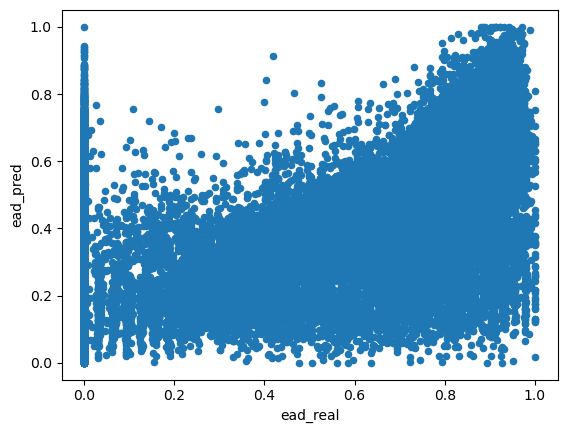

In [16]:
check_validacion.plot.scatter(x='ead_real',y='ead_pred');

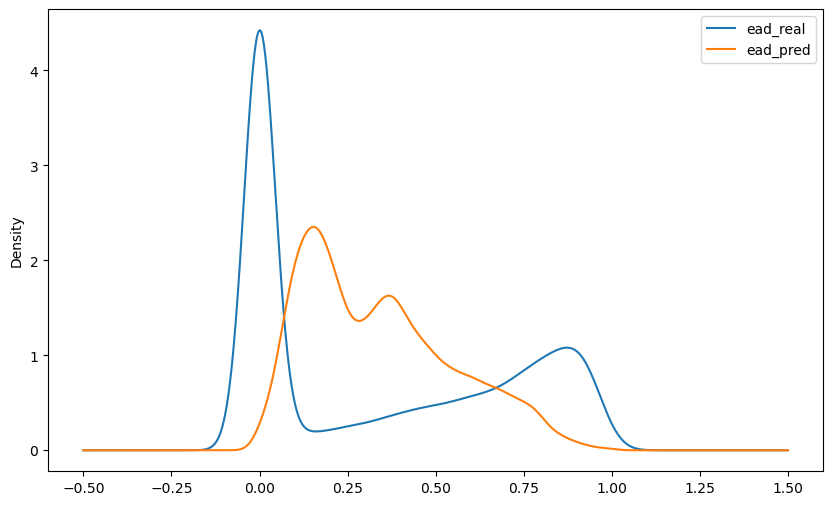

In [17]:
check_validacion.plot.density(figsize = (10,6));